In [34]:
import pandas as pd
file_path='D:/DATA/JUPYTERNOTE/my project/Online Retail.xlsx'
df=pd.read_excel(file_path)

Data Cleaning

In [6]:
#Check for missing values
missing_values=df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
#remove rows with missing values
df_cleaned = df.dropna()

In [8]:
# verify that there are no missing values left
missing_values_after_cleaning = df_cleaned.isnull().sum()
print(missing_values_after_cleaning)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
'''exploratory data analysis'''
#Basic statistics

print(df_cleaned.describe())


            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


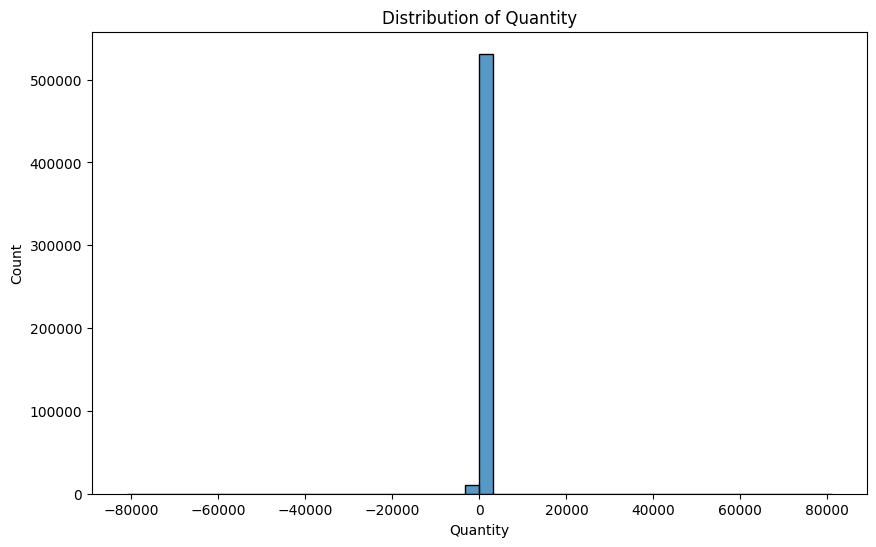

C:\Users\USER\AppData\Local\Temp\ipykernel_3276\2265185374.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['TotalPrice'].sum().plot()


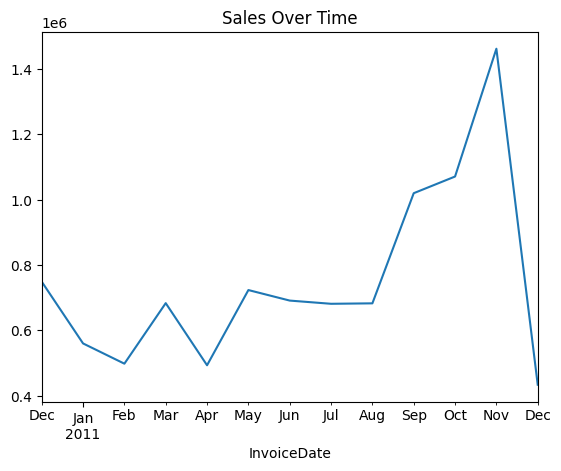

In [14]:
#dat visualaization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50)
plt.title('Distribution of Quantity')
plt.show()

# Plot sales over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.resample('M')['TotalPrice'].sum().plot()
plt.title('Sales Over Time')
plt.show()


In [15]:
# Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Top-selling countries
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_countries)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64
Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


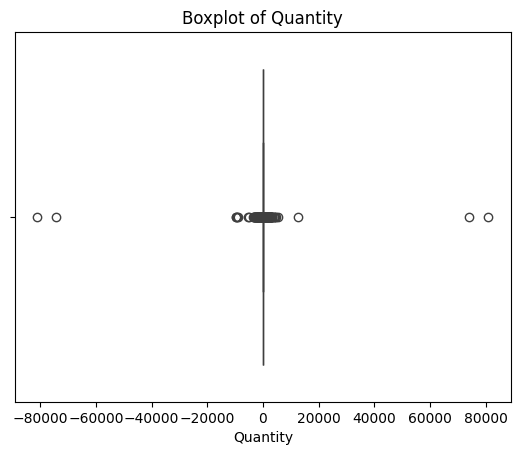

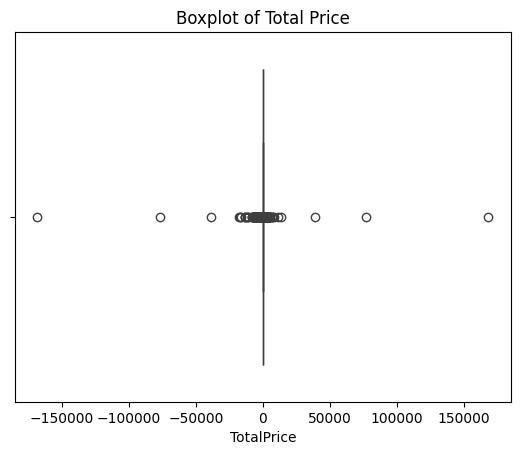

In [16]:
# Identify outliers in quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Identify outliers in total price
sns.boxplot(x=df['TotalPrice'])
plt.title('Boxplot of Total Price')
plt.show()


In [32]:
# Summarize findings
print("Summary of findings:")
print()
print("Sales Trends:\tBusiest Months: Between october ending and early November experience the heighest of peak sales months, which might be around holiday seasons or special events. Sales Patterns:")
print()
print('The top_selling Product is WORLD WAR 2 GLIDERS ASSTD DESIGNS   having a total sales of 53847 followed by JUMBO BAG RED RETROSPOT having 47363...')
print()
print('United Kingdom having 4263829 as the heighest sales country followed by Netherlands having 200128, and EIRE having 142637')
# Summarize findings
print()
print("1. Basic statistics and visualizations reveal sales trends and customer behavior.")
print("2. The busiest months and top-selling products have been identified.")
print("3. Anomalies and outliers have been highlighted for further investigation.")

Summary of findings:

Sales Trends:	Busiest Months: Between october ending and early November experience the heighest of peak sales months, which might be around holiday seasons or special events. Sales Patterns:

The top_selling Product is WORLD WAR 2 GLIDERS ASSTD DESIGNS   having a total sales of 53847 followed by JUMBO BAG RED RETROSPOT having 47363...

United Kingdom having 4263829 as the heighest sales country followed by Netherlands having 200128, and EIRE having 142637

1. Basic statistics and visualizations reveal sales trends and customer behavior.
2. The busiest months and top-selling products have been identified.
3. Anomalies and outliers have been highlighted for further investigation.
